In [17]:
library(simr)
library(anytime)
library(lmerTest)
library(tidyverse)
library(report)
library(xtable)
library(LMERConvenienceFunctions)
library(lme4)
library(ez)
library(predictmeans)
library(effects)
library(ggplot2)
library(tidyr)

round_df <- function(df, digits) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))

  df[,nums] <- round(df[,nums], digits = digits)

  (df)
}

apatheme=theme_bw()+
  theme(panel.grid.major=element_blank(),
        panel.grid.minor=element_blank(),
        panel.border=element_blank(),
        axis.line=element_line(color="black"),
        text=element_text(size=10), #change writing size
        #legend.title=element_blank(),
       legend.position = "top")




Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ stringr::fixed() masks simr::fixed()
✖ dplyr::lag()     masks stats::lag()
✖ tidyr::pack()    masks Matrix::pack()
✖ tidyr::unpack()  masks Matrix::unpack()

Warning message:
"package 'LMERConvenienceFunctions' was built under R version 4.2.1"
Warning message:
"package 'predictmeans' was built under R version 4.2.1"
Loading required package: nlme


Attaching pack

In [28]:
df<-read.csv("adaptivedf.csv") #get data
df


TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,NBackAccuracy,NBackTimePerBall,LiamsCountTotal,Flow,EDATonic,EDARaw,EDAPhasic,PId
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1660734365,1,1,2,1660734725,360.0159,0.8072727,222,0,275,80.72727,1.3091485,71,11.83281,3.6130308,3.6131692,1.384182e-04,201
1660735007,4,1,2,1660735367,360.0348,0.7548387,234,0,310,75.48387,1.1614025,1172,195.31447,4.3116370,4.3081526,-3.484431e-03,201
1660735610,5,1,2,1660735970,360.0540,0.7313916,226,0,309,73.13916,1.1652233,1549,258.12794,2.4647325,2.4649601,2.276729e-04,201
1660736236,2,1,2,1660736596,360.0186,0.8126801,282,1,348,81.03448,1.0375177,452,75.32943,3.1876016,3.1878641,2.624662e-04,201
1660736812,7,2,2,1660737172,360.0303,0.8078176,248,2,309,80.25890,1.1727370,896,149.32078,4.7820991,4.7787468,-3.352320e-03,201
1660737528,3,1,2,1660737888,360.0368,0.7611465,239,1,315,75.87302,1.1466139,816,135.98612,1.8364529,1.8365429,9.003549e-05,201
1660738127,6,1,2,1660738487,360.0259,0.7346369,263,0,358,73.46369,1.0056591,1022,170.32106,2.8633822,2.8634448,1.082858e-04,201
1660739300,6,1,2,1660739660,360.0317,0.8355705,249,0,298,83.55705,1.2081600,942,156.98618,0.5245483,0.5245656,1.718118e-05,202
1660740088,5,1,2,1660740448,360.0811,0.8636364,285,0,330,86.36364,1.0911550,1537,256.10894,0.3953161,0.3953438,2.759794e-05,202


In [19]:
df%>%filter(AdaptationStatus==1)

TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,NBackAccuracy,NBackTimePerBall,LiamsCountTotal,Flow,EDATonic,EDARaw,EDAPhasic,PId
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1660734365,1,1,2,1660734725,360.0159,0.8072727,222,0,275,80.72727,1.3091485,71,11.83281,3.6130308,3.6131692,1.384182e-04,201
1660735007,4,1,2,1660735367,360.0348,0.7548387,234,0,310,75.48387,1.1614025,1172,195.31447,4.3116370,4.3081526,-3.484431e-03,201
1660735610,5,1,2,1660735970,360.0540,0.7313916,226,0,309,73.13916,1.1652233,1549,258.12794,2.4647325,2.4649601,2.276729e-04,201
1660736236,2,1,2,1660736596,360.0186,0.8126801,282,1,348,81.03448,1.0375177,452,75.32943,3.1876016,3.1878641,2.624662e-04,201
1660737528,3,1,2,1660737888,360.0368,0.7611465,239,1,315,75.87302,1.1466139,816,135.98612,1.8364529,1.8365429,9.003549e-05,201
1660738127,6,1,2,1660738487,360.0259,0.7346369,263,0,358,73.46369,1.0056591,1022,170.32106,2.8633822,2.8634448,1.082858e-04,201
1660739300,6,1,2,1660739660,360.0317,0.8355705,249,0,298,83.55705,1.2081600,942,156.98618,0.5245483,0.5245656,1.718118e-05,202
1660740088,5,1,2,1660740448,360.0811,0.8636364,285,0,330,86.36364,1.0911550,1537,256.10894,0.3953161,0.3953438,2.759794e-05,202
1660740763,1,1,2,1660741124,360.0244,0.8421053,224,0,266,84.21053,1.3534751,78,12.99912,0.4328888,0.4327545,-1.343289e-04,202


## Create your model

In [22]:
model1 <- lmer(EDATonic ~ Flow + NBackN + (1|PId), data = df%>%filter(AdaptationStatus==1), poisson ",)

summary(model1)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: EDATonic ~ Flow + NBackN + (1 | PId)
   Data: df %>% filter(AdaptationStatus == 1)

REML criterion at convergence: 58.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.21012 -0.37409 -0.05139  0.37267  2.47600 

Random effects:
 Groups   Name        Variance Std.Dev.
 PId      (Intercept) 1.570    1.2528  
 Residual             0.281    0.5301  
Number of obs: 23, groups:  PId, 4

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)  1.7255613  0.6641396  3.5632856   2.598   0.0676 .
Flow        -0.0001505  0.0014027 18.0069135  -0.107   0.9157  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr)
Flow -0.287
fit warnings:
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

In [24]:
fixef(model1)["Flow"] # view effect

fixef(model1)["Flow"] <- -0.06 #change effect to about half 

Flow 
-0.0001505429

## Simulate Power

In [25]:
powerSim(model1)

Simulating: |                                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

Simulating: |=                                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==                                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===                                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |====                                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=====                                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |======                                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=======                                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |========                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=========                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==========                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===========                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

Simulating: |============                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=============                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

Simulating: |==============                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===============                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |================                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=================                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==================                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===================                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |====================                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=====================                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |======================                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=======================                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |========================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=========================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==========================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===========================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |============================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=============================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==============================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |===============================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |================================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=================================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==================================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===================================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |====================================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=====================================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |======================================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=======================================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |========================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=========================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==========================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===========================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |============================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=============================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==============================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===============================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |================================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |=================================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==================================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===================================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |====================================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=====================================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |======================================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=======================================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |========================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=========================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==========================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |===========================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |============================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=============================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |==============================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |===============================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |================================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |================================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

Simulating: |=================================================================

Power for predictor 'Flow', (95% confidence interval):
      100.0% (99.63, 100.0)

Test: unknown test
      Effect size for Flow is -0.060

Based on 1000 simulations, (0 warnings, 0 errors)
alpha = 0.05, nrow = 23

Time elapsed: 0 h 3 m 27 s

In [26]:
model2 <- extend(model1, along="Flow", n=20) #extend the model to increase sample size (20 per group) and simulate power


In [27]:
powerSim(model2)

Simulating: |                                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=                                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |==                                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===                                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====                                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====                                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |======                                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======                                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |==========                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===============                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |=================                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====================                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

Simulating: |=====================                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |======================                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======================                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |==========================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

Simulating: |===============================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |================================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |====================================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====================================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======================================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

Simulating: |=======================================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |===========================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |===============================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====================================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====================================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======================================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |=======================================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

Simulating: |========================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |===========================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |===============================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

Simulating: |================================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================================================

Power for predictor 'Flow', (95% confidence interval):
      13.40% (11.35, 15.67)

Test: unknown test
      Effect size for Flow is -0.060

Based on 1000 simulations, (0 warnings, 0 errors)
alpha = 0.05, nrow = 20

Time elapsed: 0 h 2 m 51 s

## Power Curve

Calculating power at 10 sample sizes along Flow



Simulating: |                                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=                                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==                                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===                                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====                                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====                                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======                                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======                                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===============                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====================                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====================                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======================                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======================                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===============================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====================================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====================================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======================================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======================================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===============================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==================================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===================================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |====================================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=====================================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |======================================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=======================================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |========================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=========================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==========================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===========================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |============================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=============================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |==============================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |===============================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |================================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

Simulating: |=================================================================( 1/10( 1/10) Simulating: |                                                         ( 1/10) Simulating: |=                                                        ( 1/10) Simulating: |==                                                       ( 1/10) Simulating: |===                                                      ( 1/10) Simulating: |====                                                     ( 1/10) Simulating: |=====                                                    ( 1/10) Simulating: |======                                                   ( 1/10) Simulating: |=======                                                  ( 1/10) Simulating: |========                                                 ( 1/10) Simulating: |=========                                                ( 1/10) Simulating: |==========                                               ( 1/10) Simulating: |===========                          

( 2/10) Simulating: |=============================================            ( 2/10) Simulating: |==============================================           ( 2/10) Simulating: |===============================================          ( 2/10) Simulating: |================================================         ( 2/10) Simulating: |=================================================        ( 2/10) Simulating: |==================================================       ( 2/10) Simulating: |===================================================      ( 2/10) Simulating: |====================================================     ( 2/10) Simulating: |=====================================================    ( 2/10) Simulating: |======================================================   ( 2/10) Simulating: |=======================================================  ( 2/10) Simulating: |======================================================== ( 2/10) Simulating: |===========================================

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 3/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 3/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSin

( 3/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 3/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column /

( 3/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 3/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 3/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 3/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column /

( 3/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 3/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 3/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 3/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 3/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 3/10) Simulating: |=========================================================( 3/10( 4/10( 4/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 4/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 4/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 4/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 4/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 4/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 4/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 4/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 4/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 4/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 4/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 4/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 4/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 4/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 4/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 4/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 4/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 4/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 4/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 4/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 4/10) Simulating: |=========================================================( 4/10( 5/10( 5/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 5/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 5/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 5/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 5/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 5/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 5/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 5/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 5/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 5/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 5/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 5/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 5/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 5/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 5/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 5/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 5/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 5/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 5/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 5/10) Simulating: |=========================================================( 5/10( 6/10( 6/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixe

( 6/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank d

( 6/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boun

( 6/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixe

( 6/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 6/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 6/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 6/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 6/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fi

( 6/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 6/10) Simulating: |=========================================================( 6/10( 7/10( 7/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 7/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 7/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 7/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 7/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 7/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 7/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boun

( 7/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 7/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 7/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 7/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 7/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 7/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 7/10) Simulating: |=========================================================( 7/10( 8/10( 8/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 8/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 8/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 8/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 8/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 8/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 8/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 8/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank d

( 8/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 8/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 8/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 8/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 8/10) Simulating: |=========================================================( 8/10( 9/10( 9/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 9/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 9/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model mat

( 9/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so droppi

( 9/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSin

( 9/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

( 9/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

( 9/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

( 9/10) Simulating: |=========================================================( 9/10(10/10(10/10) Simulating: |                                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=                                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==                                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===                                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |====                                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=====                                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |======                                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=======                                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |========                                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=========                                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==========                                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===========                                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |============                                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=============                                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==============                                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===============                                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |================                                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=================                                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==================                                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===================                                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |====================                                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=====================                                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |======================                                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=======================                                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |========================                                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=========================                                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==========================                                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===========================                               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |============================                              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=============================                             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==============================                            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===============================                           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |================================                          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=================================                         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==================================                        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===================================                       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |====================================                      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=====================================                     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |======================================                    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=======================================                   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |========================================                  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model mat

(10/10) Simulating: |=========================================                 |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==========================================                |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===========================================               |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |============================================              |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=============================================             |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |==============================================            |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |===============================================           |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |================================================          |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |=================================================         |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |==================================================        |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |===================================================       |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |====================================================      |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=====================================================     |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |======================================================    |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=======================================================   |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

boundary (singular) fit: see help('isSingular')

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coef

(10/10) Simulating: |========================================================  |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |========================================================= |

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

fixed-effect model matrix is rank defici

(10/10) Simulating: |=========================================================(10/10Power for predictor 'Flow', (95% confidence interval),
by largest value of Flow:
      3:  0.00% ( 0.00,  0.37) - 3 rows
      5:  0.00% ( 0.00,  0.37) - 5 rows
      7:  4.50% ( 3.30,  5.98) - 7 rows
      9:  3.60% ( 2.53,  4.95) - 9 rows
     11:  3.30% ( 2.28,  4.60) - 11 rows
     12:  4.30% ( 3.13,  5.75) - 12 rows
     14:  5.90% ( 4.52,  7.54) - 14 rows
     16:  6.80% ( 5.32,  8.54) - 16 rows
     18: 11.10% ( 9.22, 13.21) - 18 rows
     20: 12.30% (10.33, 14.50) - 20 rows

Time elapsed: 0 h 21 m 52 s


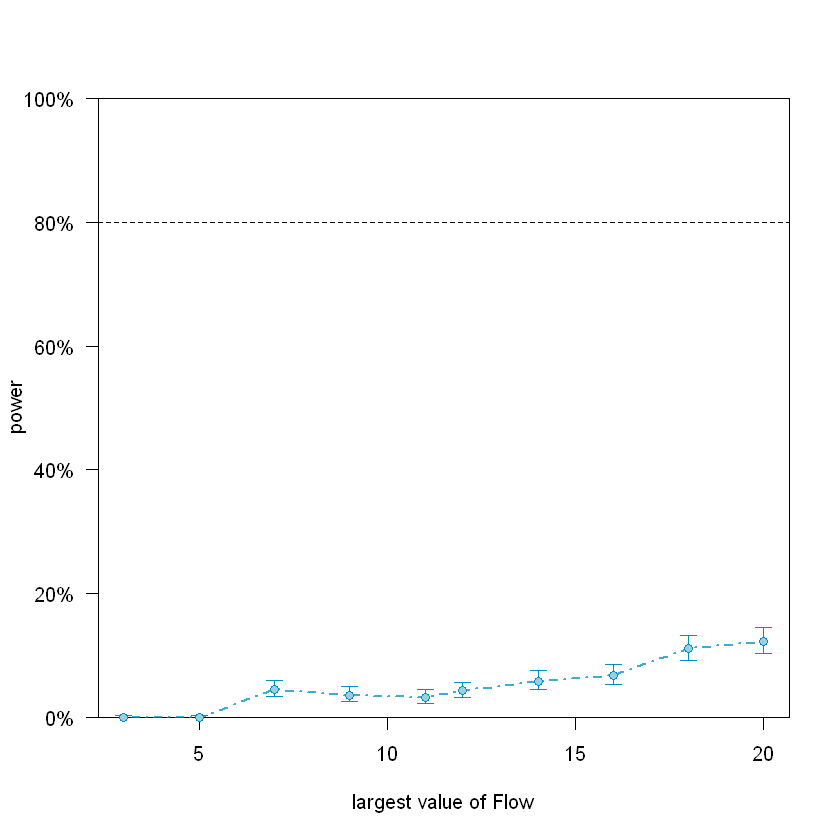

In [29]:
pc2 <- powerCurve(model2)
print(pc2)
plot(pc2)

In [30]:
pc2


Power for predictor 'Flow', (95% confidence interval),
by largest value of Flow:
      3:  0.00% ( 0.00,  0.37) - 3 rows
      5:  0.00% ( 0.00,  0.37) - 5 rows
      7:  4.50% ( 3.30,  5.98) - 7 rows
      9:  3.60% ( 2.53,  4.95) - 9 rows
     11:  3.30% ( 2.28,  4.60) - 11 rows
     12:  4.30% ( 3.13,  5.75) - 12 rows
     14:  5.90% ( 4.52,  7.54) - 14 rows
     16:  6.80% ( 5.32,  8.54) - 16 rows
     18: 11.10% ( 9.22, 13.21) - 18 rows
     20: 12.30% (10.33, 14.50) - 20 rows

Time elapsed: 0 h 21 m 52 s